In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
# Read csv file
titanic = pd.read_csv('data/train.csv')
titanic_test = pd.read_csv('data/test.csv')

# Splitting PassengerId from dataframe
passenger_id = titanic['PassengerId']
passenger_id_test = titanic_test['PassengerId']

# Drop non required columns from dataframe
titanic = titanic.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


NaN value: 
Age: 177
Cabin: 687
Embarked: 2


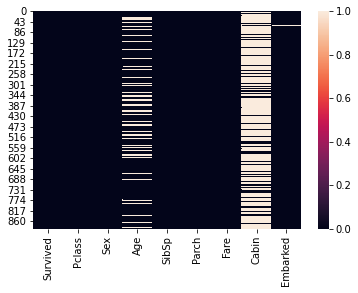

In [4]:
_ = sns.heatmap(titanic.isna())

print('NaN value: ')
for key, value in titanic.isna().sum().to_dict().items():
    if value != 0:
        print(f"{key}: {value}")

False


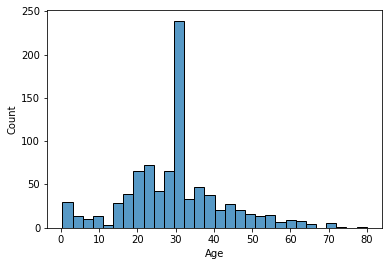

In [5]:
# Replacing nan with mean
titanic['Age'] = titanic['Age'].replace(np.nan, titanic['Age'].mean())

# Checking if still any nan data
print(titanic['Age'].isna().any())

_ = sns.histplot(titanic['Age'])

Total Non Nan Value: 204
NaN data? True


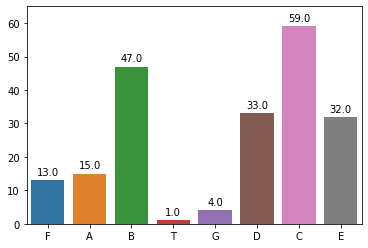

In [6]:
# See non- NaN value data in Cabin
alp_data = []
for data in titanic['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

result = 0
letters = []
count_letters = []
for i in list(set(alp_data)):
    letters.append(i)
    count_letters.append(np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1])
    result += np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1]

print(f"Total Non Nan Value: {result}")

splot = sns.barplot(x=letters, y=count_letters)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 65)

# Checking NaN data is still available?
print(f"NaN data? {titanic['Cabin'].isna().any()}")

Total Non Nan Value: 891
NaN data? False


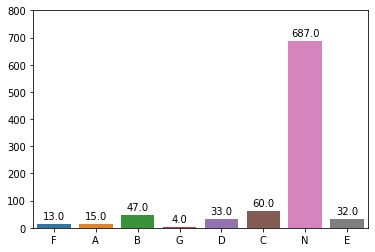

In [7]:
# Replace nan value to something letter in alphabet, and replacing Cabin ID with first letter of the Cabin ID
titanic['Cabin'].fillna('N_cabin', inplace=True) # change to N

for i in list(set(alp_data)):
    # replace Cabin ID with first letter of the Cabin ID
    if i == 'T':
        # we append T to C because T is only 1
        titanic.loc[titanic['Cabin'].str.startswith(i), 'Cabin'] = f"C_cabin" 
    else:
    
        titanic.loc[titanic['Cabin'].str.startswith(i), 'Cabin'] = f"{i}_cabin" 

# See non- NaN value data in Cabin
alp_data = []
for data in titanic['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

result = 0
letters = []
count_letters = []
for i in list(set(alp_data)):
    letters.append(i)
    count_letters.append(np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1])
    result += np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1]

print(f"Total Non Nan Value: {result}")

splot = sns.barplot(x=letters, y=count_letters)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

# NaN data is still available?
print(f"NaN data? {titanic['Cabin'].isna().any()}")

NaN Value: 2


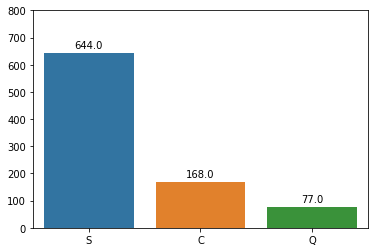

In [8]:
# How much NaN Value
print(f"NaN Value: {titanic['Embarked'].isna().value_counts().values[1]}")

# How much non NaN Value
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

NaN Value? False


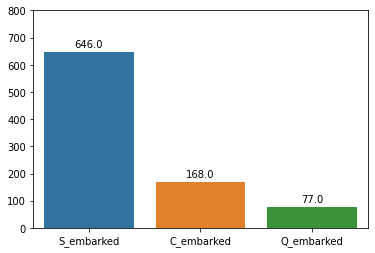

In [9]:
# I think is better to append NaN value to S, because that value is the massive one
titanic['Embarked'].fillna('S', inplace=True) # change to S

for i in list(titanic['Embarked'].value_counts().index):
    
    titanic.loc[titanic['Embarked'].str.startswith(i), 'Embarked'] = f"{i}_embarked" 

# is NaN value is still available
print(f"NaN Value? {titanic['Embarked'].isna().any()}")

# How much non NaN Value
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

NaN value: 


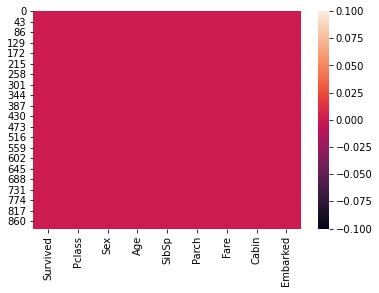

In [10]:
# is NaN value is still available?

_ = sns.heatmap(titanic.isna())

print('NaN value: ')
for key, value in titanic.isna().sum().to_dict().items():
    if value != 0:
        print(f"{key}: {value}")

# yeah, that's gone

In [11]:
# now, how about dataframe?
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N_cabin,S_embarked
1,1,1,female,38.000000,1,0,71.2833,C_cabin,C_embarked
2,1,3,female,26.000000,0,0,7.9250,N_cabin,S_embarked
3,1,1,female,35.000000,1,0,53.1000,C_cabin,S_embarked
4,0,3,male,35.000000,0,0,8.0500,N_cabin,S_embarked
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N_cabin,S_embarked
887,1,1,female,19.000000,0,0,30.0000,B_cabin,S_embarked
888,0,3,female,29.699118,1,2,23.4500,N_cabin,S_embarked
889,1,1,male,26.000000,0,0,30.0000,C_cabin,C_embarked


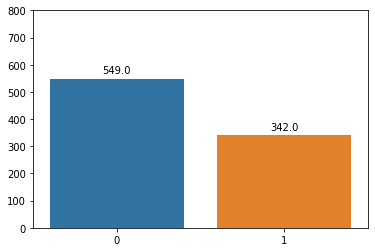

In [12]:
# it's time to visualizing the data

# Survived columns
splot = sns.barplot(x=list(titanic['Survived'].value_counts().index), y=titanic['Survived'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

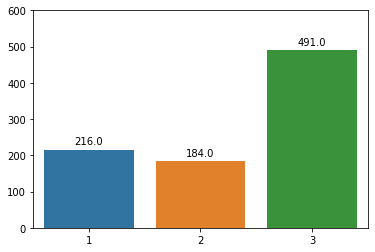

In [13]:
# Pclass columns
splot = sns.barplot(x=list(titanic['Pclass'].value_counts().index), y=titanic['Pclass'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 600)

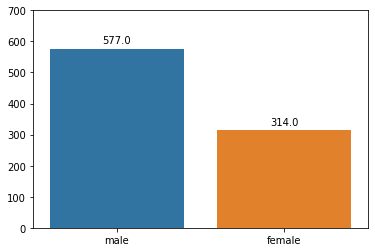

In [14]:
# Sex
splot = sns.barplot(x=list(titanic['Sex'].value_counts().index), y=titanic['Sex'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 700)

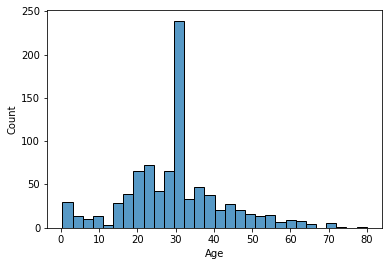

In [15]:
# Age
_ = sns.histplot(titanic['Age'])

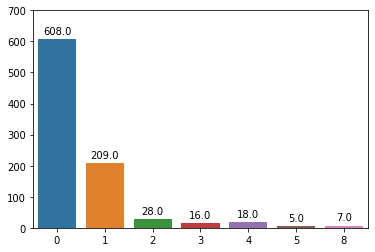

In [16]:
# SibSp
splot = sns.barplot(x=list(titanic['SibSp'].value_counts().index), y=titanic['SibSp'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 700)

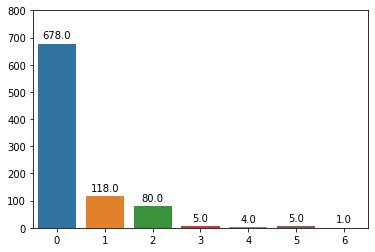

In [17]:
# Parch
splot = sns.barplot(x=list(titanic['Parch'].value_counts().index), y=titanic['Parch'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

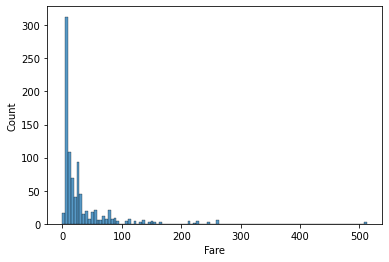

In [18]:
# Fare
_ = sns.histplot(titanic['Fare'])

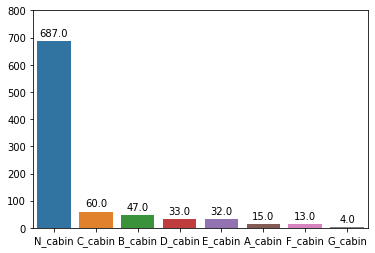

In [19]:
# Cabin
splot = sns.barplot(x=list(titanic['Cabin'].value_counts().index), y=titanic['Cabin'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

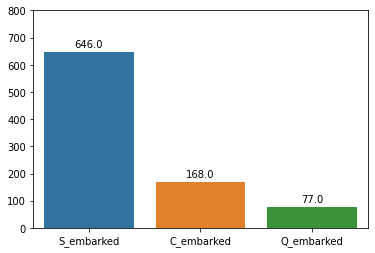

In [20]:
# Embarked
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

In [21]:
# One-Hot Encoding
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N_cabin,S_embarked
1,1,1,female,38.000000,1,0,71.2833,C_cabin,C_embarked
2,1,3,female,26.000000,0,0,7.9250,N_cabin,S_embarked
3,1,1,female,35.000000,1,0,53.1000,C_cabin,S_embarked
4,0,3,male,35.000000,0,0,8.0500,N_cabin,S_embarked
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N_cabin,S_embarked
887,1,1,female,19.000000,0,0,30.0000,B_cabin,S_embarked
888,0,3,female,29.699118,1,2,23.4500,N_cabin,S_embarked
889,1,1,male,26.000000,0,0,30.0000,C_cabin,C_embarked


In [22]:
'''
non float64 is Survived, Pclass, Sex, 
               SibSp, Parch, Cabin and Embarked
'''
print(titanic.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [23]:
# then, first i will convert object datatype to float

# creating child dataframe
sex = pd.get_dummies(titanic['Sex']).astype('float64')
cabin = pd.get_dummies(titanic['Cabin']).astype('float64')
embarked = pd.get_dummies(titanic['Embarked']).astype('float64')

# after it, we join the dataframe to parent dataframe 
titanic = titanic.join(sex)
titanic = titanic.join(cabin)
titanic = titanic.join(embarked)
titanic = titanic.drop(['Sex', 'Cabin', 'Embarked'], axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,A_cabin,B_cabin,C_cabin,D_cabin,E_cabin,F_cabin,G_cabin,N_cabin,C_embarked,Q_embarked,S_embarked
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# there is still int64 datatype
print(titanic.dtypes)

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
female        float64
male          float64
A_cabin       float64
B_cabin       float64
C_cabin       float64
D_cabin       float64
E_cabin       float64
F_cabin       float64
G_cabin       float64
N_cabin       float64
C_embarked    float64
Q_embarked    float64
S_embarked    float64
dtype: object


In [25]:
# convert int64 to float64
titanic['Survived'] = titanic['Survived'].astype('float64')
titanic['Pclass'] = titanic['Pclass'].astype('float64')
titanic['SibSp'] = titanic['SibSp'].astype('float64')
titanic['Parch'] = titanic['Parch'].astype('float64')

# is converted?
print(titanic.dtypes)

Survived      float64
Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
female        float64
male          float64
A_cabin       float64
B_cabin       float64
C_cabin       float64
D_cabin       float64
E_cabin       float64
F_cabin       float64
G_cabin       float64
N_cabin       float64
C_embarked    float64
Q_embarked    float64
S_embarked    float64
dtype: object


In [26]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,A_cabin,B_cabin,C_cabin,D_cabin,E_cabin,F_cabin,G_cabin,N_cabin,C_embarked,Q_embarked,S_embarked
0,0.0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,1.0,19.000000,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,3.0,29.699118,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


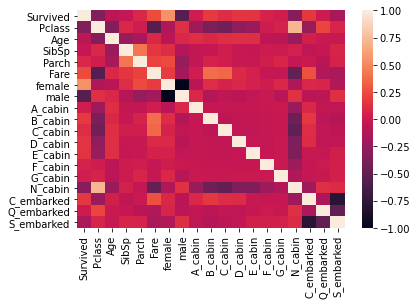

In [27]:
_ = sns.heatmap(titanic.corr())

# Let's Train

In [28]:
titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [29]:
# resample to make data balance
from sklearn.utils import resample
def resampling_dataset(df):
    df0 = df[df['Survived']==0]
    df1 = df[df['Survived']==1]
    df_resample = resample(df1, replace=True, 
                            n_samples=df['Survived'].value_counts()[0], random_state=123)
    df = pd.concat([df0, df_resample])
    return df
titanic_resampled = resampling_dataset(titanic)

In [30]:
X = titanic_resampled.drop(['Survived'], axis=1)
y = titanic_resampled['Survived']

In [31]:
y.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

In [32]:
# convert y to array
y = np.array(y)

In [33]:
# before normalizing
X.describe()

,Pclass,Age,SibSp,Parch,Fare,female,male,A_cabin,B_cabin,C_cabin,D_cabin,E_cabin,F_cabin,G_cabin,N_cabin,C_embarked,Q_embarked,S_embarked
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,2.247723,29.094525,0.515483,0.399818,35.119160,0.387067,0.612933,0.020036,0.057377,0.082878,0.046448,0.041894,0.014572,0.002732,0.734062,0.215847,0.087432,0.696721
std,0.862793,13.516176,1.034605,0.788176,54.191547,0.487301,0.487301,0.140189,0.232668,0.275823,0.210549,0.200439,0.119886,0.052223,0.442033,0.411596,0.282595,0.459884
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,15.850000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,1.000000,33.890600,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# lets normalize the dataset using StandarScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler()
X = scale.fit_transform(X) # convert it to array then normalizing

In [35]:
# after normalizing
X.shape

(1098, 18)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [37]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(878, 18) (220, 18) (878,) (220,)


In [38]:
# adding dataset to model
# using Machine Learning method

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

models =[("Logistic Regression", LogisticRegression()),
         ("Support Vector Machines", SVC()),
         ('K-Nearest Neighbors',KNeighborsClassifier()),
         ("Decision Tree Classifier", DecisionTreeClassifier()),
         ("Gaussian Naive Bayes", GaussianNB()),
         ("Stocastic Gradient Descend", SGDClassifier()),
         ("Perceptron", Perceptron()),
         ("Nearest Centroid",NearestCentroid()),
         ("Ridge", RidgeClassifier()),
         ("Nu Support Vector Machines", NuSVC()),
         ("Bernoulli Naive Bayes", BernoulliNB()),
         ('Random Forest',RandomForestClassifier()),
         ('AdaBoost',AdaBoostClassifier()),
         ('XGB',GradientBoostingClassifier()),
         ('PAC',PassiveAggressiveClassifier())]


names = []
scores = []
results = {}

for name,model in models:
    
    names.append(name)
    
    model.fit(x_train, y_train)
    
    result = model.predict(x_test)
    score = accuracy_score(y_test, result)*100
    scores.append(score)
    
for key in names:
    for value in scores:
        results[key] = f'{value:.2f}%'
        scores.remove(value)
        break

results = sorted(results.items(), key=lambda x: x[1], reverse=True)
results_df = pd.DataFrame.from_dict(results)
results_df = results_df.rename(columns={0: 'Model', 1:'Score'})
results_df

,Model,Score
0,Decision Tree Classifier,88.18%
1,Random Forest,85.91%
2,XGB,85.00%
3,AdaBoost,81.82%
4,Logistic Regression,79.55%
5,Ridge,79.09%
6,Nu Support Vector Machines,79.09%
7,Support Vector Machines,78.64%
8,Perceptron,78.64%
9,K-Nearest Neighbors,77.73%


In [40]:
# using deep learning method

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > (0.88)):
            print("\nSTOPPU")
            self.model.stop_training = True



model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu',input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary()

callbacks = myCallback()
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics=['mse', 'mae','accuracy']) #mse

model.fit(x_train, y_train, validation_split=0.2, epochs=500, verbose=1, callbacks=[callbacks])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                304       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
22/22 [==============================] - 2s 44ms/step - loss: 0.2805 - mse: 0.2805 - mae: 0.5142 - accuracy: 0.5

22/22 [==============================] - 0s 3ms/step - loss: 0.1462 - mse: 0.1462 - mae: 0.3068 - accuracy: 0.8176 - val_loss: 0.1159 - val_mse: 0.1159 - val_mae: 0.2712 - val_accuracy: 0.8523
Epoch 35/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1479 - mse: 0.1479 - mae: 0.3091 - accuracy: 0.8127 - val_loss: 0.1162 - val_mse: 0.1162 - val_mae: 0.2715 - val_accuracy: 0.8466
Epoch 36/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1504 - mse: 0.1504 - mae: 0.3108 - accuracy: 0.7989 - val_loss: 0.1146 - val_mse: 0.1146 - val_mae: 0.2659 - val_accuracy: 0.8523
Epoch 37/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1402 - mse: 0.1402 - mae: 0.2964 - accuracy: 0.8223 - val_loss: 0.1143 - val_mse: 0.1143 - val_mae: 0.2654 - val_accuracy: 0.8523
Epoch 38/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1392 - mse: 0.1392 - mae: 0.2960 - accuracy: 0.8350 - val_loss: 0.1158 - val_mse: 0.1158 - val_mae: 0.2689 - val_

Epoch 74/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1292 - mse: 0.1292 - mae: 0.2654 - accuracy: 0.8240 - val_loss: 0.1146 - val_mse: 0.1146 - val_mae: 0.2399 - val_accuracy: 0.8636
Epoch 75/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1212 - mse: 0.1212 - mae: 0.2533 - accuracy: 0.8146 - val_loss: 0.1146 - val_mse: 0.1146 - val_mae: 0.2400 - val_accuracy: 0.8693
Epoch 76/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1236 - mse: 0.1236 - mae: 0.2559 - accuracy: 0.8209 - val_loss: 0.1180 - val_mse: 0.1180 - val_mae: 0.2452 - val_accuracy: 0.8523
Epoch 77/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1329 - mse: 0.1329 - mae: 0.2650 - accuracy: 0.8174 - val_loss: 0.1134 - val_mse: 0.1134 - val_mae: 0.2348 - val_accuracy: 0.8693
Epoch 78/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1195 - mse: 0.1195 - mae: 0.2463 - accuracy: 0.8359 - val_loss: 0.1146 - val_mse: 0.1146 - val_mae: 

Epoch 114/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1291 - mse: 0.1291 - mae: 0.2529 - accuracy: 0.8233 - val_loss: 0.1173 - val_mse: 0.1173 - val_mae: 0.2244 - val_accuracy: 0.8580
Epoch 115/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1158 - mse: 0.1158 - mae: 0.2320 - accuracy: 0.8441 - val_loss: 0.1193 - val_mse: 0.1193 - val_mae: 0.2304 - val_accuracy: 0.8580
Epoch 116/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1071 - mse: 0.1071 - mae: 0.2189 - accuracy: 0.8535 - val_loss: 0.1166 - val_mse: 0.1166 - val_mae: 0.2240 - val_accuracy: 0.8409
Epoch 117/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1097 - mse: 0.1097 - mae: 0.2230 - accuracy: 0.8603 - val_loss: 0.1185 - val_mse: 0.1185 - val_mae: 0.2259 - val_accuracy: 0.8580
Epoch 118/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1135 - mse: 0.1135 - mae: 0.2259 - accuracy: 0.8463 - val_loss: 0.1173 - val_mse: 0.1173 - val_

22/22 [==============================] - 0s 4ms/step - loss: 0.1110 - mse: 0.1110 - mae: 0.2214 - accuracy: 0.8568 - val_loss: 0.1180 - val_mse: 0.1180 - val_mae: 0.2197 - val_accuracy: 0.8466
Epoch 154/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1009 - mse: 0.1009 - mae: 0.2036 - accuracy: 0.8601 - val_loss: 0.1192 - val_mse: 0.1192 - val_mae: 0.2254 - val_accuracy: 0.8523
Epoch 155/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1052 - mse: 0.1052 - mae: 0.2096 - accuracy: 0.8697 - val_loss: 0.1211 - val_mse: 0.1211 - val_mae: 0.2272 - val_accuracy: 0.8466
Epoch 156/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1102 - mse: 0.1102 - mae: 0.2139 - accuracy: 0.8486 - val_loss: 0.1198 - val_mse: 0.1198 - val_mae: 0.2254 - val_accuracy: 0.8466
Epoch 157/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0990 - mse: 0.0990 - mae: 0.2068 - accuracy: 0.8751 - val_loss: 0.1222 - val_mse: 0.1222 - val_mae: 0.2303 - 

Epoch 193/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0975 - mse: 0.0975 - mae: 0.1958 - accuracy: 0.8726 - val_loss: 0.1185 - val_mse: 0.1185 - val_mae: 0.2171 - val_accuracy: 0.8580
Epoch 194/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1122 - mse: 0.1122 - mae: 0.2122 - accuracy: 0.8501 - val_loss: 0.1178 - val_mse: 0.1178 - val_mae: 0.2169 - val_accuracy: 0.8580
Epoch 195/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1021 - mse: 0.1021 - mae: 0.1948 - accuracy: 0.8619 - val_loss: 0.1175 - val_mse: 0.1175 - val_mae: 0.2191 - val_accuracy: 0.8580
Epoch 196/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0960 - mse: 0.0960 - mae: 0.1982 - accuracy: 0.8729 - val_loss: 0.1194 - val_mse: 0.1194 - val_mae: 0.2213 - val_accuracy: 0.8466
Epoch 197/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1141 - mse: 0.1141 - mae: 0.2172 - accuracy: 0.8448 - val_loss: 0.1170 - val_mse: 0.1170 - val_

In [41]:
predictions = model.predict(x_test)
def see_score(y_validate, predictions, threshold):
    test = [x for x in predictions]
    pred = []
    for x in test:
        if x[0] > threshold: # Higher Threshold
            pred.append(1)
        else:                # Lower Threshold
            pred.append(0)
    tn, fp, fn, tp = confusion_matrix(y_validate, pred).ravel()
    print(f"Threshold = {threshold}: \n1: {pred.count(1)}, 0: {pred.count(0)}, Accuracy: {accuracy_score(y_validate, pred)}")
    print(f'True 1: {tp}, True 0: {tn}, False 1: {fp}, False 0: {fn}')
    print(f'Predicted True: {tp+tn}, Predicted False: {fp+fn}\n')
    
    
for i in range(101):
    see_score(y_test, predictions, i/100)

Threshold = 0.0: 
1: 220, 0: 0, Accuracy: 0.4863636363636364
True 1: 107, True 0: 0, False 1: 113, False 0: 0
Predicted True: 107, Predicted False: 113

Threshold = 0.01: 
1: 208, 0: 12, Accuracy: 0.5318181818181819
True 1: 106, True 0: 11, False 1: 102, False 0: 1
Predicted True: 117, Predicted False: 103

Threshold = 0.02: 
1: 205, 0: 15, Accuracy: 0.5454545454545454
True 1: 106, True 0: 14, False 1: 99, False 0: 1
Predicted True: 120, Predicted False: 100

Threshold = 0.03: 
1: 203, 0: 17, Accuracy: 0.5545454545454546
True 1: 106, True 0: 16, False 1: 97, False 0: 1
Predicted True: 122, Predicted False: 98

Threshold = 0.04: 
1: 201, 0: 19, Accuracy: 0.5636363636363636
True 1: 106, True 0: 18, False 1: 95, False 0: 1
Predicted True: 124, Predicted False: 96

Threshold = 0.05: 
1: 201, 0: 19, Accuracy: 0.5636363636363636
True 1: 106, True 0: 18, False 1: 95, False 0: 1
Predicted True: 124, Predicted False: 96

Threshold = 0.06: 
1: 201, 0: 19, Accuracy: 0.5636363636363636
True 1: 106

Threshold = 0.67: 
1: 106, 0: 114, Accuracy: 0.85
True 1: 90, True 0: 97, False 1: 16, False 0: 17
Predicted True: 187, Predicted False: 33

Threshold = 0.68: 
1: 105, 0: 115, Accuracy: 0.8454545454545455
True 1: 89, True 0: 97, False 1: 16, False 0: 18
Predicted True: 186, Predicted False: 34

Threshold = 0.69: 
1: 105, 0: 115, Accuracy: 0.8454545454545455
True 1: 89, True 0: 97, False 1: 16, False 0: 18
Predicted True: 186, Predicted False: 34

Threshold = 0.7: 
1: 105, 0: 115, Accuracy: 0.8454545454545455
True 1: 89, True 0: 97, False 1: 16, False 0: 18
Predicted True: 186, Predicted False: 34

Threshold = 0.71: 
1: 105, 0: 115, Accuracy: 0.8454545454545455
True 1: 89, True 0: 97, False 1: 16, False 0: 18
Predicted True: 186, Predicted False: 34

Threshold = 0.72: 
1: 104, 0: 116, Accuracy: 0.8409090909090909
True 1: 88, True 0: 97, False 1: 16, False 0: 19
Predicted True: 185, Predicted False: 35

Threshold = 0.73: 
1: 103, 0: 117, Accuracy: 0.8454545454545455
True 1: 88, True 0: 9

# Let's Predict titanic_test

In [42]:
print(passenger_id_test)
print(titanic_test)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64
     Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked
0         3    male  34.5      0      0    7.8292   NaN        Q
1         3  female  47.0      1      0    7.0000   NaN        S
2         2    male  62.0      0      0    9.6875   NaN        Q
3         3    male  27.0      0      0    8.6625   NaN        S
4         3  female  22.0      1      1   12.2875   NaN        S
..      ...     ...   ...    ...    ...       ...   ...      ...
413       3    male   NaN      0      0    8.0500   NaN        S
414       1  female  39.0      0      0  108.9000  C105        C
415       3    male  38.5      0      0    7.2500   NaN        S
416       3    male   NaN      0      0    8.0500   NaN        S
417       3    male   NaN      1      1   22.3583   NaN        C

[418 rows x 8 columns]


In [43]:
titanic_test.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Cabin        True
Embarked    False
dtype: bool

In [44]:
# Replacing nan with mean
titanic_test['Age'] = titanic_test['Age'].replace(np.nan, titanic_test['Age'].mean())
titanic_test['Age'].isna().any()

False

In [45]:
# See non- NaN value data in Cabin
alp_data = []
for data in titanic_test['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

# Replace nan value to something letter in alphabet, and replacing Cabin ID with first letter of the Cabin ID
titanic_test['Cabin'].fillna('N_cabin', inplace=True) # change to N

for i in list(set(alp_data)):
    
    # replace Cabin ID with first letter of the Cabin ID
    titanic_test.loc[titanic_test['Cabin'].str.startswith(i), 'Cabin'] = f"{i}_cabin"
    
titanic_test['Cabin'].isna().any()

False

In [46]:
# Replacing nan with mean
titanic_test['Fare'] = titanic_test['Fare'].replace(np.nan, titanic_test['Fare'].mean())
titanic_test['Fare'].isna().any()

False

In [47]:
titanic_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Cabin       False
Embarked    False
dtype: bool

In [48]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,7.8292,N_cabin,Q
1,3,female,47.00000,1,0,7.0000,N_cabin,S
2,2,male,62.00000,0,0,9.6875,N_cabin,Q
3,3,male,27.00000,0,0,8.6625,N_cabin,S
4,3,female,22.00000,1,1,12.2875,N_cabin,S
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,N_cabin,S
414,1,female,39.00000,0,0,108.9000,C_cabin,C
415,3,male,38.50000,0,0,7.2500,N_cabin,S
416,3,male,30.27259,0,0,8.0500,N_cabin,S


In [49]:
'''
non float64 is Survived, Pclass, Sex, 
               SibSp, Parch, Cabin and Embarked
'''
print(titanic_test.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [50]:
# then, first i will convert object datatype to float

# creating child dataframe
sex_test = pd.get_dummies(titanic_test['Sex']).astype('float64')
cabin_test = pd.get_dummies(titanic_test['Cabin']).astype('float64')
embarked_test = pd.get_dummies(titanic_test['Embarked']).astype('float64')

# after it, we join the dataframe to parent dataframe 
titanic_test = titanic_test.join(sex_test)
titanic_test = titanic_test.join(cabin_test)
titanic_test = titanic_test.join(embarked_test)
titanic_test = titanic_test.drop(['Sex', 'Cabin', 'Embarked'], axis=1)
titanic_test

,Pclass,Age,SibSp,Parch,Fare,female,male,A_cabin,B_cabin,C_cabin,D_cabin,E_cabin,F_cabin,G_cabin,N_cabin,C,Q,S
0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,108.9000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
# there is still int64 datatype
print(titanic_test.dtypes)

Pclass       int64
Age        float64
SibSp        int64
Parch        int64
Fare       float64
female     float64
male       float64
A_cabin    float64
B_cabin    float64
C_cabin    float64
D_cabin    float64
E_cabin    float64
F_cabin    float64
G_cabin    float64
N_cabin    float64
C          float64
Q          float64
S          float64
dtype: object


In [52]:
# convert int64 to float64
titanic_test['Pclass'] = titanic_test['Pclass'].astype('float64')
titanic_test['SibSp'] = titanic_test['SibSp'].astype('float64')
titanic_test['Parch'] = titanic_test['Parch'].astype('float64')

# is converted?
print(titanic_test.dtypes)

Pclass     float64
Age        float64
SibSp      float64
Parch      float64
Fare       float64
female     float64
male       float64
A_cabin    float64
B_cabin    float64
C_cabin    float64
D_cabin    float64
E_cabin    float64
F_cabin    float64
G_cabin    float64
N_cabin    float64
C          float64
Q          float64
S          float64
dtype: object


In [53]:
titanic_test

,Pclass,Age,SibSp,Parch,Fare,female,male,A_cabin,B_cabin,C_cabin,D_cabin,E_cabin,F_cabin,G_cabin,N_cabin,C,Q,S
0,3.0,34.50000,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.00000,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,62.00000,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.00000,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.00000,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,30.27259,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1.0,39.00000,0.0,0.0,108.9000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,3.0,38.50000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,3.0,30.27259,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
X_test = titanic_test

In [55]:
# lets normalize the dataset using StandarScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler()
X_test = scale.fit_transform(X_test) # convert it to array then normalizing

In [56]:
X_test

array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        ,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]])

In [57]:
# after normalizing
X_test.shape

(418, 18)

In [58]:
# using machine learning
model1 = RandomForestClassifier()
model1.fit(x_test, y_test)
model1_result = model1.predict(X_test)
model1_result = model1_result.astype('int64')

# write it to csv
raw_submission_ml = {
        "PassengerId": passenger_id_test.values,
        "Survived": model1_result
    }
submission_ml = pd.DataFrame(data=raw_submission_ml)
submission_ml.to_csv('submission_ml1.csv', index=False)
submission_ml

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
# using machine learning
model3 = DecisionTreeClassifier()
model3.fit(x_test, y_test)
model3_result = model3.predict(X_test)
model3_result = model3_result.astype('int64')

# write it to csv
raw_submission_ml3 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model3_result
    }
submission_ml3 = pd.DataFrame(data=raw_submission_ml3)
submission_ml3.to_csv('submission_ml3.csv', index=False)
submission_ml3

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
("Decision Tree Classifier", DecisionTreeClassifier()),

# using machine learning
model2 = GradientBoostingClassifier()
model2.fit(x_test, y_test)
model2_result = model2.predict(X_test)
model2_result = model2_result.astype('int64')

# write it to csv
raw_submission_ml2 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model2_result
    }
submission_ml2 = pd.DataFrame(data=raw_submission_ml2)
submission_ml2.to_csv('submission_ml2.csv', index=False)
submission_ml2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
# using Deep learning
model_result = model.predict(X_test)

def model_to_threshold(predictions, threshold):
    test = [x for x in predictions]
    pred = []
    for x in test:
        if x[0] > threshold: # Higher Threshold
            pred.append(1)
        else:                # Lower Threshold
            pred.append(0)
    return np.array(pred).astype('int64')
model_results = model_to_threshold(model_result, 0.6)

# write it to csv
raw_submission_dl = {
        "PassengerId": passenger_id_test.values,
        "Survived": model_results
    }
submission_dl = pd.DataFrame(data=raw_submission_dl)
submission_dl.to_csv('submission_dl.csv', index=False)
submission_dl

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
